In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()


In [2]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

df = spark.createDataFrame([
    Row(a=1, b=2., c='string1', d=date(2000, 1, 1), e=datetime(2000, 1, 1, 12, 0)),
    Row(a=2, b=3., c='string2', d=date(2000, 2, 1), e=datetime(2000, 1, 2, 12, 0)),
    Row(a=4, b=5., c='string3', d=date(2000, 3, 1), e=datetime(2000, 1, 3, 12, 0))
])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [15]:
guns = spark.read.format('csv').option('header','true').load('dataset_gun.csv')
guns.createOrReplaceTempView('gunsData')
guns.show()
guns = guns.dropna()

+-------------------+----------+-----------+----------------+------------------------+------------------+-------------------+---------------------+--------------+-----------------+-----------------------+--------------------------------+---------------+----------------------------+------------------------+--------------------+
|            Country|Population|regulations|firearms_per_100|Fire_arms_with_civilians|Computation_method|Registered_firearms|Unregistered_firearms|Gun_Death_Rate|Deaths_by_firearm|Suicide_Rate_by_Firearm|Unintentional_Deaths_by_Firearms|Police_Killings|Rate_Police_Killing _per_10M|Data_Year_Police_Killing|               Notes|
+-------------------+----------+-----------+----------------+------------------------+------------------+-------------------+---------------------+--------------+-----------------+-----------------------+--------------------------------+---------------+----------------------------+------------------------+--------------------+
|            

In [6]:
guns = spark.read.format('csv').option('header','true').load('dataset_gun.csv')
guns.createOrReplaceTempView('gunsData')
guns.show()

+-------------------+----------+--------------------------------------------------------------+---------------------------------------------+-------------------------------------------+------------------+-------------------+---------------------+--------------+-----------------+-----------------------+--------------------------------+---------------+-----------------------------+------------------------+--------------------+
|            Country|Population|The regulation of guns in the United Nations is categorised as|Estimate of civilian firearms per 100 persons|Estimate of firearms in civilian possession|Computation method|Registered firearms|Unregistered firearms|Gun Death Rate|Deaths by firearm|Suicide Rate by Firearm|Unintentional Deaths by Firearms|Police Killings|Rate Police Killing (per 10M)|Data Year Police Killing|               Notes|
+-------------------+----------+--------------------------------------------------------------+---------------------------------------------+-

In [16]:
guns = spark.read.format('csv').option('header','true').load('dataset_gun.csv')
guns.createOrReplaceTempView('gunsData')
guns.show()

+-------------------+----------+-----------+----------------+------------------------+------------------+-------------------+---------------------+--------------+-----------------+-----------------------+--------------------------------+---------------+----------------------------+------------------------+--------------------+
|            Country|Population|regulations|firearms_per_100|Fire_arms_with_civilians|Computation_method|Registered_firearms|Unregistered_firearms|Gun_Death_Rate|Deaths_by_firearm|Suicide_Rate_by_Firearm|Unintentional_Deaths_by_Firearms|Police_Killings|Rate_Police_Killing _per_10M|Data_Year_Police_Killing|               Notes|
+-------------------+----------+-----------+----------------+------------------------+------------------+-------------------+---------------------+--------------+-----------------+-----------------------+--------------------------------+---------------+----------------------------+------------------------+--------------------+
|            

In [17]:
guns = spark.read.format('csv').option('header','true').load('dataset_gun.csv')
guns.createOrReplaceTempView('gunsData')
guns.show()

+-------------------+----------+-----------+----------------+------------------------+------------------+-------------------+---------------------+--------------+-----------------+-----------------------+--------------------------------+---------------+----------------------------+------------------------+--------------------+
|            Country|Population|regulations|firearms_per_100|Fire_arms_with_civilians|Computation_method|Registered_firearms|Unregistered_firearms|Gun_Death_Rate|Deaths_by_firearm|Suicide_Rate_by_Firearm|Unintentional_Deaths_by_Firearms|Police_Killings|Rate_Police_Killing _per_10M|Data_Year_Police_Killing|               Notes|
+-------------------+----------+-----------+----------------+------------------------+------------------+-------------------+---------------------+--------------+-----------------+-----------------------+--------------------------------+---------------+----------------------------+------------------------+--------------------+
|            

In [18]:
from pyspark.sql.types import IntegerType,BooleanType,DoubleType,DateType
guns = guns.withColumn("Registered_firearms",guns.Registered_firearms.cast(IntegerType()))
guns = guns.withColumn("Unregistered_firearms",guns.Unregistered_firearms.cast(IntegerType()))

In [19]:
spark.sql('SELECT sum(Registered_firearms) total_registered, sum(Unregistered_firearms) total_unregistered from gunsData').show()

+----------------+------------------+
|total_registered|total_unregistered|
+----------------+------------------+
|     9.8850955E7|      2.91719845E8|
+----------------+------------------+



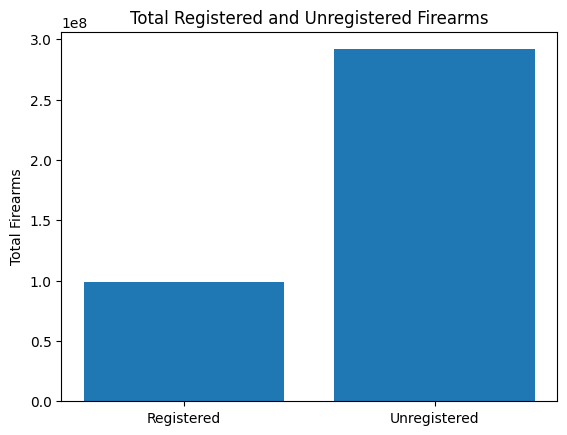

In [21]:
# Goal 01
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
result_df = spark.sql('SELECT sum(Registered_firearms) total_registered, sum(Unregistered_firearms) total_unregistered from gunsData').toPandas()
totals = result_df.iloc[0]
fig, ax = plt.subplots()
ax.bar(['Registered', 'Unregistered'], totals)
ax.set_title('Total Registered and Unregistered Firearms')
ax.set_ylabel('Total Firearms')
plt.show()

In [20]:
spark.sql('select Country,Deaths_by_firearm  from gunsData where regulations="restrictive"').show()

+-------------------+-----------------+
|            Country|Deaths_by_firearm|
+-------------------+-----------------+
|            Albania|               40|
|Antigua and Barbuda|                2|
|          Argentina|             1709|
|            Armenia|               21|
|          Australia|               45|
|            Austria|               13|
|         Azerbaijan|               29|
|            Bahamas|             null|
|         Bangladesh|             1235|
|           Barbados|               12|
|            Belarus|               45|
|            Belgium|               41|
|             Belize|               67|
|            Bolivia|              306|
|             Brazil|            47510|
|             Brunei|                0|
|           Bulgaria|               40|
|       Burkina Faso|              682|
|            Burundi|               31|
|           Cambodia|              163|
+-------------------+-----------------+
only showing top 20 rows



In [22]:
spark.sql('select Country,Deaths_by_firearm  from gunsData where regulations="restrictive"').show()

+-------------------+-----------------+
|            Country|Deaths_by_firearm|
+-------------------+-----------------+
|            Albania|               40|
|Antigua and Barbuda|                2|
|          Argentina|             1709|
|            Armenia|               21|
|          Australia|               45|
|            Austria|               13|
|         Azerbaijan|               29|
|            Bahamas|             null|
|         Bangladesh|             1235|
|           Barbados|               12|
|            Belarus|               45|
|            Belgium|               41|
|             Belize|               67|
|            Bolivia|              306|
|             Brazil|            47510|
|             Brunei|                0|
|           Bulgaria|               40|
|       Burkina Faso|              682|
|            Burundi|               31|
|           Cambodia|              163|
+-------------------+-----------------+
only showing top 20 rows



In [45]:
spark.sql('SELECT Country, Deaths_by_firearm FROM gunsData WHERE regulations is null order by Deaths_by_firearm desc limit 20').show()

+--------------------+-----------------+
|             Country|Deaths_by_firearm|
+--------------------+-----------------+
|              Israel|               95|
|   Equatorial Guinea|                9|
|Bosnia and Herzeg...|                9|
|            Botswana|               88|
|         The Bahamas|               81|
|        Saudi Arabia|               80|
|            Mongolia|                8|
|             Somalia|              783|
|         Ivory Coast|              707|
|             Bahrain|                6|
|Central African R...|               59|
|       Guinea-Bissau|               55|
|               Niger|              528|
|                Iran|              525|
|          The Gambia|                5|
|               Libya|               46|
|             Georgia|               46|
|            Eswatini|               43|
|        Sierra Leone|               43|
|               Qatar|                4|
+--------------------+-----------------+



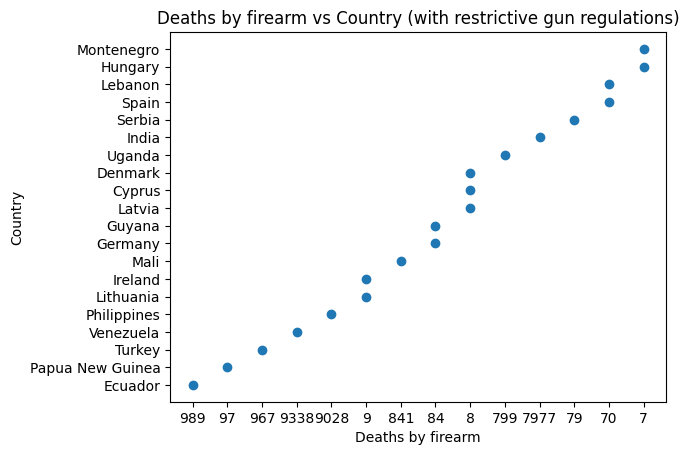

In [24]:
#goal 02
import matplotlib.pyplot as plt
df = spark.sql('SELECT Country, Deaths_by_firearm FROM gunsData WHERE regulations="restrictive" order by Deaths_by_firearm desc limit 20').toPandas()
df = df.dropna(subset=['Country', 'Deaths_by_firearm'])
fig, ax = plt.subplots()
ax.scatter(df['Deaths_by_firearm'], df['Country'])
ax.set_xlabel('Deaths by firearm')
ax.set_ylabel('Country')
ax.set_title('Deaths by firearm vs Country (with restrictive gun regulations)')
plt.show()


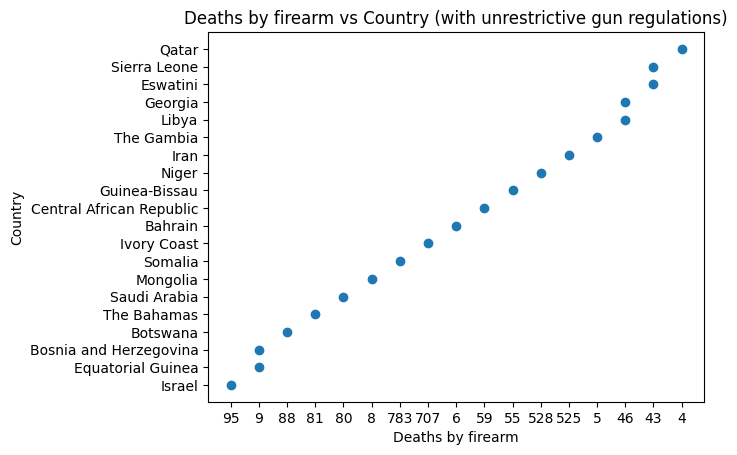

In [25]:
#goal 3
import matplotlib.pyplot as plt
df = spark.sql('SELECT Country, Deaths_by_firearm FROM gunsData WHERE regulations is null order by Deaths_by_firearm desc limit 20').toPandas()
df = df.dropna(subset=['Country', 'Deaths_by_firearm'])
fig, ax = plt.subplots()
ax.scatter(df['Deaths_by_firearm'], df['Country'])
ax.set_xlabel('Deaths by firearm')
ax.set_ylabel('Country')
ax.set_title('Deaths by firearm vs Country (with unrestrictive gun regulations)')
plt.show()

In [26]:
#goal 4
spark.sql('select country, Gun_Death_Rate from gunsData').show()

+-------------------+--------------+
|            country|Gun_Death_Rate|
+-------------------+--------------+
|            Albania|          1.39|
|            Algeria|          0.31|
|     American Samoa|          null|
|            Andorra|          0.08|
|             Angola|          0.61|
|Antigua and Barbuda|           1.9|
|          Argentina|          3.64|
|            Armenia|          0.64|
|              Aruba|          null|
|          Australia|          0.18|
|            Austria|          0.13|
|         Azerbaijan|          0.27|
|            Bahamas|          null|
|            Bahrain|          0.36|
|         Bangladesh|          0.78|
|           Barbados|           4.3|
|            Belarus|          0.43|
|            Belgium|          0.34|
|             Belize|         15.04|
|              Benin|          2.57|
+-------------------+--------------+
only showing top 20 rows



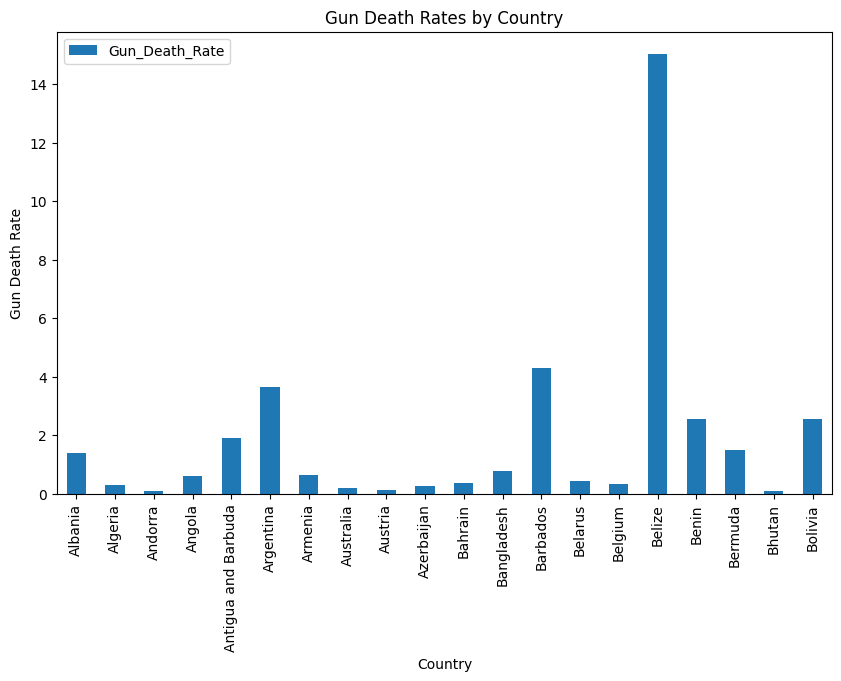

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
data = spark.sql('select country, CAST(Gun_Death_Rate as double) as Gun_Death_Rate from gunsData').toPandas()
data.dropna(inplace=True)
data.set_index('country', inplace=True)
data = data.head(20)
fig, ax = plt.subplots(figsize=(10,6))
data.plot(kind='bar', ax=ax)
ax.set_title('Gun Death Rates by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Gun Death Rate')
plt.show()


In [72]:
#goal 5
spark.sql('select country, Fire_arms_with_civilians from gunsData').show()

+-------------------+------------------------+
|            country|Fire_arms_with_civilians|
+-------------------+------------------------+
|            Albania|                    2000|
|            Algeria|                14859000|
|     American Samoa|                  115000|
|            Andorra|                 2719000|
|             Angola|                  245000|
|Antigua and Barbuda|                12708000|
|          Argentina|                 1198000|
|            Armenia|                  285000|
|              Aruba|                 1793000|
|          Australia|                 1927000|
|            Austria|                  106000|
|         Azerbaijan|                 1185000|
|            Bahamas|                 2577000|
|            Bahrain|                  621000|
|         Bangladesh|                   11000|
|           Barbados|                 1537000|
|            Belarus|                  119000|
|            Belgium|                 2332000|
|            

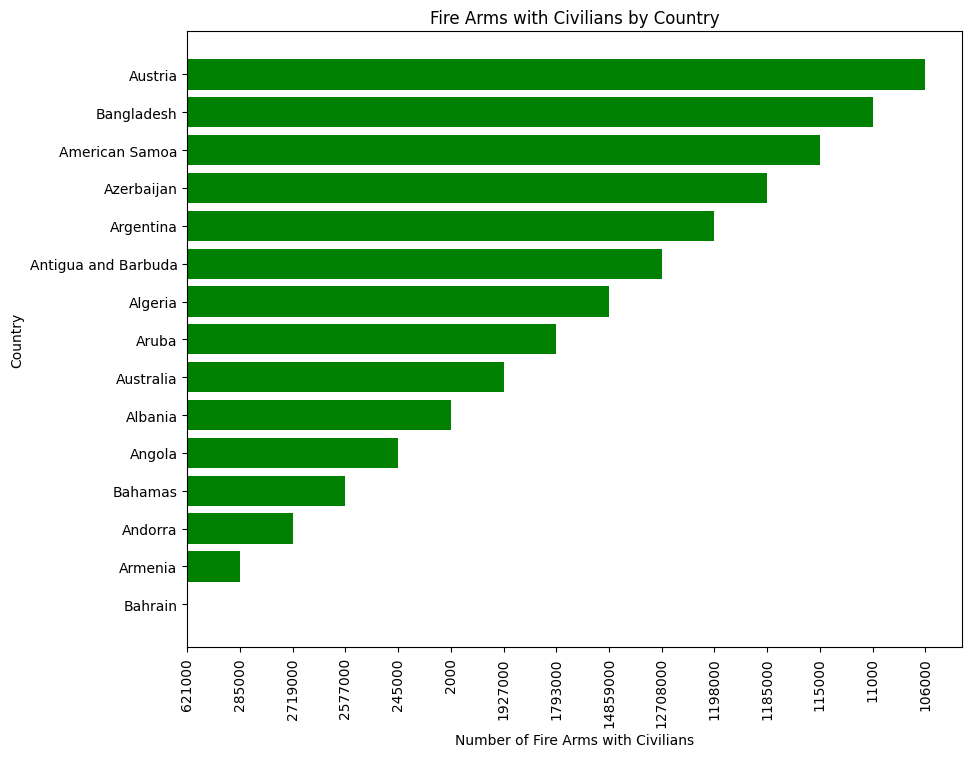

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
df = guns.select('Country', 'Fire_arms_with_civilians').toPandas()
df = df.dropna()
df = df.head(15)
df = df.sort_values(by='Fire_arms_with_civilians', ascending=False)
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(df['Country'], df['Fire_arms_with_civilians'], color='green')
ax.set_title('Fire Arms with Civilians by Country')
ax.set_xlabel('Number of Fire Arms with Civilians')
ax.set_ylabel('Country')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [73]:
#goal 6
spark.sql('select country, firearms_per_100 from gunsData').show() 

+-------------------+----------------+
|            country|firearms_per_100|
+-------------------+----------------+
|            Albania|            62.1|
|            Algeria|            52.8|
|     American Samoa|            42.5|
|            Andorra|            39.1|
|             Angola|            39.1|
|Antigua and Barbuda|            34.7|
|          Argentina|            34.7|
|            Armenia|              34|
|              Aruba|            32.4|
|          Australia|            31.9|
|            Austria|            31.7|
|         Azerbaijan|            31.2|
|            Bahamas|              30|
|            Bahrain|            29.8|
|         Bangladesh|            28.8|
|           Barbados|            28.8|
|            Belarus|            28.3|
|            Belgium|            27.6|
|             Belize|            26.3|
|              Benin|            23.8|
+-------------------+----------------+
only showing top 20 rows



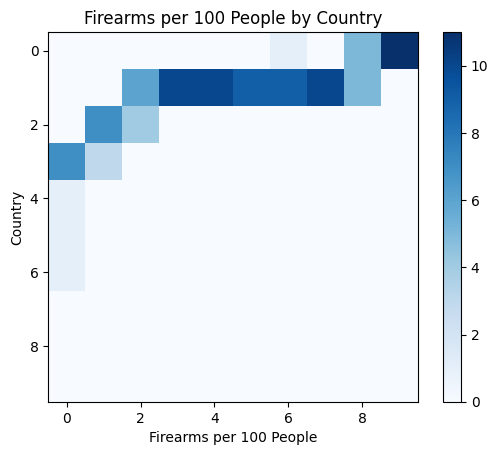

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("dataset_gun.csv")
country = data['Country']
firearms_per_100 = data['firearms_per_100']
country_encoded = pd.get_dummies(country)
bins = np.linspace(0, 100, 11)
heatmap, xedges, yedges = np.histogram2d(firearms_per_100, np.argmax(country_encoded.values, axis=1), bins=bins)
plt.xlabel('Firearms per 100 People')
plt.ylabel('Country')
plt.imshow(heatmap, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Firearms per 100 People by Country')
plt.show()

In [123]:
#goal 7
spark.sql('select  count(Unintentional_Deaths_by_Firearms) unintentional_deaths, ((select count(*) from gunsData) -count(Unintentional_Deaths_by_Firearms)) intentional_deaths from gunsData where Unintentional_Deaths_by_Firearms is not null').show() 

+--------------------+------------------+
|unintentional_deaths|intentional_deaths|
+--------------------+------------------+
|                 191|                48|
+--------------------+------------------+



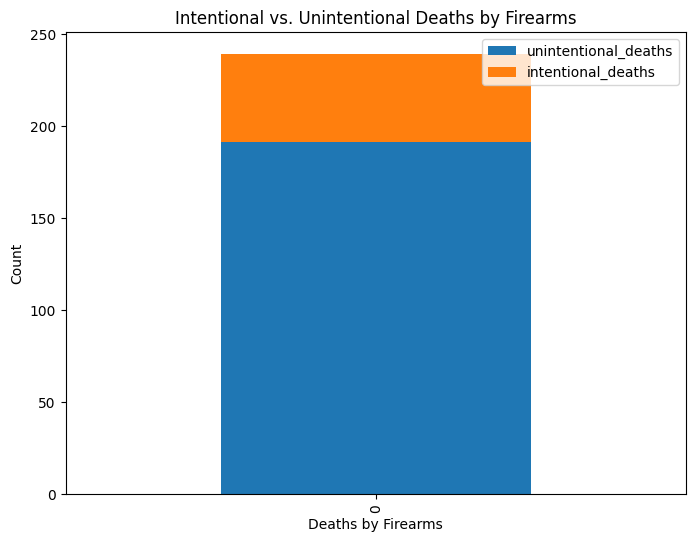

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
df = spark.sql('select count(Unintentional_Deaths_by_Firearms) unintentional_deaths, ((select count(*) from gunsData) -count(Unintentional_Deaths_by_Firearms)) intentional_deaths from gunsData where Unintentional_Deaths_by_Firearms is not null').toPandas()
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6))
ax.set_xlabel('Deaths by Firearms')
ax.set_ylabel('Count')
ax.set_title('Intentional vs. Unintentional Deaths by Firearms')
plt.show()

In [107]:
#Goal 8
spark.sql('select country, Suicide_Rate_by_Firearm from gunsData where Suicide_Rate_by_Firearm is not null ').show() 

+-------------------+-----------------------+
|            country|Suicide_Rate_by_Firearm|
+-------------------+-----------------------+
|            Albania|                   0.97|
|            Algeria|                   0.17|
|            Andorra|                    0.6|
|             Angola|                   0.37|
|Antigua and Barbuda|                   0.07|
|          Argentina|                   2.67|
|            Armenia|                   0.49|
|          Australia|                   0.75|
|            Austria|                   2.47|
|         Azerbaijan|                   0.09|
|            Bahrain|                    0.1|
|         Bangladesh|                   0.15|
|           Barbados|                   0.24|
|            Belarus|                   0.56|
|            Belgium|                   1.58|
|             Belize|                   0.73|
|              Benin|                   0.44|
|            Bermuda|                   0.05|
|             Bhutan|             

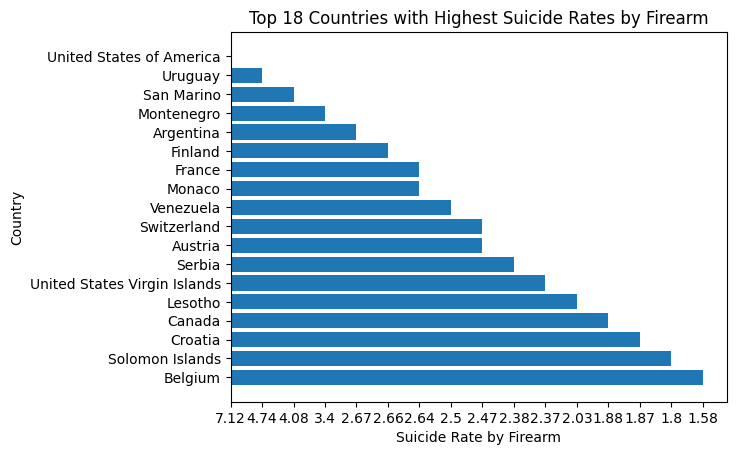

In [120]:
#goal 8
import pandas as pd
import matplotlib.pyplot as plt
guns_df = spark.sql("select country, Suicide_Rate_by_Firearm from gunsData where Suicide_Rate_by_Firearm is not null")
guns_pd = guns_df.toPandas()
guns_pd = guns_pd.sort_values(by=['Suicide_Rate_by_Firearm'], ascending=False)
top_10_countries = guns_pd.head(18)
plt.barh(top_10_countries['country'], top_10_countries['Suicide_Rate_by_Firearm'])
plt.gca().invert_yaxis() # invert the y-axis to have the countries on it
plt.xlabel('Suicide Rate by Firearm')
plt.ylabel('Country')
plt.title('Top 18 Countries with Highest Suicide Rates by Firearm')
plt.show()


In [99]:
#goal 9
spark.sql('select country, Police_Killings from gunsData where police_killings is not null order by Police_Killings desc').show() 

+--------------------+---------------+
|             country|Police_Killings|
+--------------------+---------------+
|           Argentina|             95|
|United States of ...|            946|
|             Nigeria|            841|
|           Indonesia|           77.1|
|             Uruguay|             67|
|         Philippines|         6069.1|
|                Mali|           60.1|
|              Brazil|           5804|
|           Venezuela|           5287|
|               Nepal|            5.1|
|         Netherlands|              5|
|             Belgium|              5|
|            Pakistan|            495|
|          Bangladesh|            466|
| Trinidad and Tobago|             46|
|        South Africa|            436|
|           Australia|              4|
|             Burundi|             39|
|Democratic Republ...|            389|
|              Mexico|            371|
+--------------------+---------------+
only showing top 20 rows



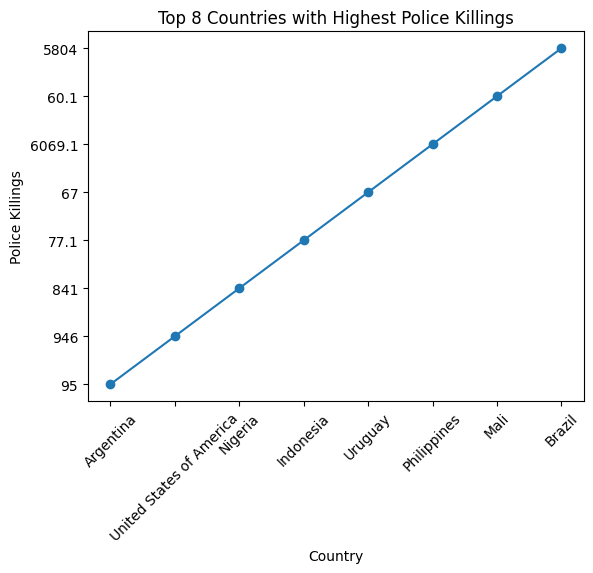

In [105]:
#goal 9

import matplotlib.pyplot as plt
import pandas as pd
import pyspark.sql.functions as F
df = spark.sql('select country, Police_Killings from gunsData where police_killings is not null order by Police_Killings desc').toPandas()
df = df.head(8)
plt.plot(df['country'], df['Police_Killings'], marker='o')
plt.title('Top 8 Countries with Highest Police Killings')
plt.xlabel('Country')
plt.ylabel('Police Killings')
plt.xticks(rotation=45)
plt.show()

In [85]:
#Goal 10
spark.sql('select count(regulations) as regulated_countries, ((select count(*) from gunsData)-count(regulations)) as non_regulated_countries from gunsData where regulations ="restrictive" ').show()



+-------------------+-----------------------+
|regulated_countries|non_regulated_countries|
+-------------------+-----------------------+
|                128|                    111|
+-------------------+-----------------------+



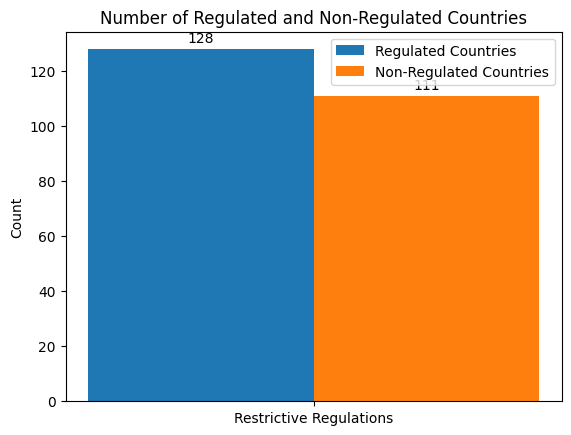

In [89]:
#Goal 10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('GunDataAnalysis').getOrCreate()
result = spark.sql('select count(regulations) as regulated_countries, ((select count(*) from gunsData)-count(regulations)) as non_regulated_countries from gunsData where regulations ="restrictive" ')
df = result.toPandas()
fig, ax = plt.subplots()
x = np.arange(len(df))
width = 0.35
rects1 = ax.bar(x - width/2, df['regulated_countries'], width, label='Regulated Countries')
rects2 = ax.bar(x + width/2, df['non_regulated_countries'], width, label='Non-Regulated Countries')
ax.set_xticks(x)
ax.set_xticklabels(['Restrictive Regulations'])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.set_ylabel('Count')
ax.set_title('Number of Regulated and Non-Regulated Countries')
plt.show()